<a href="https://colab.research.google.com/github/pySTEPS/ERAD-nowcasting-course-2022/blob/hands-on-users/solutions/exercise_02_input_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pysteps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 496 kB 3.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Using cached jsmin-3.0.1-py3-none-any.whl
  Created wheel for pysteps: filename=pysteps-1.6.3-cp37-cp37m-linux_x86_64.whl size=1082050 sha256=1d0c4cf6a9d9b35d5f8d9b145c97c6270f1477acdae718a3a8559439e05a9d6c
  Stored in directory: /root/.cache/pip/wheels/16/4a/cc/18934087b86dee897a58fad9f847a223a52a15fac94a934b90
Successfully built pysteps


# Load and visualize the input data

In this example, we show how to use the utility functions for loading the sample datasets and plot the data by using the pysteps visualization tools.

## Download the example data

First, we will use the [pysteps.datasets.download_pysteps_data()](https://pysteps.readthedocs.io/en/latest/generated/pysteps.datasets.download_pysteps_data.html) function to download the data.

In [ ]:
from pysteps.datasets import download_pysteps_data

download_pysteps_data("pysteps_data")

Progress: (267.9 Mb) - Time left: unknown
Download complete



## Create the pystepsrc file

A pystepsrc file needs to be created for locating the datasets. To create this file, we will use the [pysteps.datasets.create_default_pystepsrc()](https://pysteps.readthedocs.io/en/latest/generated/pysteps.datasets.create_default_pystepsrc.html#pysteps.datasets.create_default_pystepsrc) helper function and load the configuration file by using [pysteps.load_config_file](https://pysteps.readthedocs.io/en/stable/generated/pysteps.load_config_file.html).

In [ ]:
import pysteps
from pysteps.datasets import create_default_pystepsrc

config_file_path = create_default_pystepsrc("pysteps_data")
_ = pysteps.load_config_file(config_file_path, verbose=True)

Pysteps configuration file found at: /root/.pysteps/pystepsrc



## Load the example dataset

Now that we have installed the example data, let's import the example MeteoSwiss dataset using the [load_dataset()](https://pysteps.readthedocs.io/en/latest/generated/pysteps.datasets.load_dataset.html) helper function from the `pysteps.datasets` module. The dataset contains radar-derived rain rates from Switzerland.

In [ ]:
from pysteps.datasets import load_dataset
precip, metadata, timestep = load_dataset('mch')

Then we can print the metadata using [pprint](https://docs.python.org/3/library/pprint.html).

In [ ]:
from pprint import pprint
pprint(metadata)

{'accutime': 5,
 'cartesian_unit': 'm',
 'institution': 'MeteoSwiss',
 'product': 'AQC',
 'projection': '+proj=somerc  +lon_0=7.43958333333333 +lat_0=46.9524055555556 '
               '+k_0=1 +x_0=600000 +y_0=200000 +ellps=bessel '
               '+towgs84=674.374,15.056,405.346,0,0,0,0 +units=m +no_defs',
 'threshold': 0.009909609120596347,
 'timestamps': array([datetime.datetime(2015, 5, 15, 15, 45),
       datetime.datetime(2015, 5, 15, 15, 50),
       datetime.datetime(2015, 5, 15, 15, 55),
       datetime.datetime(2015, 5, 15, 16, 0),
       datetime.datetime(2015, 5, 15, 16, 5),
       datetime.datetime(2015, 5, 15, 16, 10),
       datetime.datetime(2015, 5, 15, 16, 15),
       datetime.datetime(2015, 5, 15, 16, 20),
       datetime.datetime(2015, 5, 15, 16, 25),
       datetime.datetime(2015, 5, 15, 16, 30),
       datetime.datetime(2015, 5, 15, 16, 35),
       datetime.datetime(2015, 5, 15, 16, 40),
       datetime.datetime(2015, 5, 15, 16, 45),
       datetime.datetime(2015, 5

This should have printed the following key-value pairs:

*   `accutime`: accumulation time (minutes) for computing the quantity contained in the data
*   `cartesian_unit`: the distance unit of the geographical coordinates
*   `institution`: institution providing the data
*   `product`: name of the product
*   `projection`: PROJ-compatible projection definition
*   `threshold`: the minimum observed value
*   `timestamps`: list of timestamps, one for each element in the returned data array
*   `transform`: applied transformation to the data values (if any)
*   `unit`: the unit of the data
*   `x1`: x-coordinate of the lower-left corner of the domain in geographical coordinates
*   `x2`: x-coordinate of the upper-right corner of the domain in geographical coordinates
*   `xpixelsize`: pixel size in x-direction (meters)
*   `y1`: y-coordinate of the lower-left corner of the domain in geographical coordinates
*   `y2`: y-coordinate of the upper-right corner of the domain in geographical coordinates
*   `yorigin`: 'upper' or 'lower' depending on whether the origin of the coordinate system is in the lower-left or upper-left corner
*   `ypixelsize`: pixel size in y-direction (meters)
*   `zerovalue`: value corresponding to no precipitation
*   `zr_a`: the a-coefficient in the Z(R) relationship Z=a*R^b applied to the data (if representing rain rate)
*   `zr_b`: the b-coefficient in the Z(R) relationship Z=a*R^b applied to the data (if representing rain rate)


## Plot the data

Next we will use the [plot_precip_field](https://pysteps.readthedocs.io/en/stable/generated/pysteps.visualization.precipfields.plot_precip_field.html#pysteps.visualization.precipfields.plot_precip_field) function from the `pysteps.visualization.precipfields` module to plot the data. Here we plot the last element in the time series.

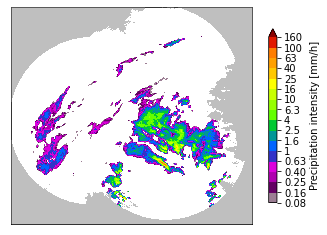

In [ ]:
from pysteps.visualization import plot_precip_field
plot_precip_field(precip[-1], geodata=metadata, axis="off")

The other supported colorscales are 'STEPS-BE' and 'BOM-RF3'. They look like this.

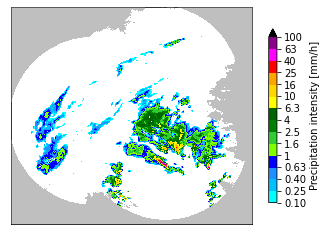

In [ ]:
plot_precip_field(precip[-1], geodata=metadata, axis="off", colorscale="STEPS-BE")

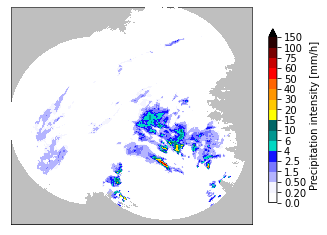

In [ ]:
plot_precip_field(precip[-1], geodata=metadata, axis="off", colorscale="BOM-RF3")

TODO: show how to plot lon-lat lines, tick labels and basemap